# Prerequisites
Background of the following in mandetory:

- Knowledge of mathematical functions.
- Comfortable with Pandas and Scipy.
- Knowledge of feature, types and characteristics.
- Knowledge of Q-Q plot and histogram.

## Learning

In this chapter, you are learning about

- Types of mathematical transformation commonly applied in ML pipelines.
- Theory and use cases.
- Code snippets are present throughout the notebook introducing implementation of the mathematical transformation. 

These codes are useful for understanding how to apply the transformation on your own, and how they change the variables of the dataset. Histograms and Q-Q plots are used to inspect how the variables are distributed.


# Mathematical Transformations

Linear and Logistic regression, Principle Component Analysis(PCA), and Linear Discriminant Analysis(LDA) are some examples of ML algorithms that assume variables to be linear and normally distributed. When the variable doesn't obey the assumptions performance of the ML algorithms severely degrades.

This is where __Mathematical Transformations__ come into play. Mathematical transformations are process to convert the numerical variable's value into other values. Taking the logarithm, exponent, power are some examples of mathematical transformations.

Mathematical transformations are often used for:

- Normalization of the magnitude of variables.

- Transform skewed distribution of variables to Gaussian distribution.

- Uncover the linear relationship between variables and target output.

These transformation results improvement in the performance of ML models that are heavily dependent on the above assumptions, such as linear and Gaussian distributed variables.

__Quantile-Quantile plot__(Q-Q plot) is a graphical tool to help inspect where the variable is following normal distribution or not. Quantiles are division made to the data points of the data into equal division. If data is divided into 100 equal parts it's known as percentile. 50th percentile represents half of the data lies below this point.

Q-Q plot is a scatterplot where we are plotting two sets of quantiles against each other. The x-axis represents the theoretical quantiles(Here, quantiles of normal distribution), while Y-axis has the actual quantile of a variable. If they are a perfect match, the variable quantile lies of 45 degree line. 

## Types of Mathematical Transformation

Most commonly used mathematical transformations are the following:

1. Logarithmic transformation
2. Reciprocal transformation
3. Exponential/Power transformation
4. Box-Cox transformation
5. Yeo-Johnson transformation

Top three of the transformation have familiar mathematical terms in the names. These three are simple mathematical transformations applied to the numerical value of variables. Last two are a bit different and uses special mathematical formula.

### Logarithmic transformation

Logarithmic transformation is the most common mathematical transformation technique, which applies the log function(inverse of exponential function) on the variables to get a transformed variable.

The log function is defined as:
$$
\log_a(a^x) = x
$$
where, $a$ is a positive constant, and $x$ is any positive number.

Let's plot the log function and deduce its properties.

In [0]:
# importing required libraries
import numpy as np # for numpy array operations
import matplotlib.pyplot as plt # for visualization

Creating a dummy variable for showing log function.

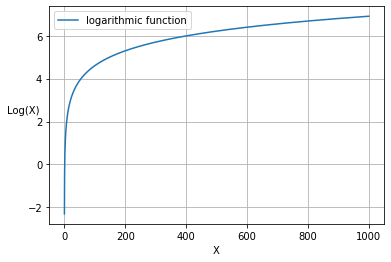

In [0]:
# creating dummy variables to show logarithmic transformation
X = np.linspace(0.1,1000,100000) #input variable
log_y = np.log(X) #output variable

plt.grid()
plt.plot(X,log_y, label="logarithmic function")
plt.xlabel('X')
plt.ylabel('Log(X)', rotation=0)
plt.legend()

The plot above shows the log function. The exclusive property of log function is that it maps the smaller range of values to large range while compressing the larger range of values into smaller space.

The function $log_{10}(x)$ maps the ranges as:

- (0,1] to (-$\infty$, 0]
- [1,10] to [0, 1]
- [10,100] to [1,2]
and so on

### Use case
- Log transformation helps in __handling skewed data__. Applying log transformation makes variable distribution similar to normal distribution.

- Log transformation __normalizes the magnitude differences__ of variables since it expands the space of lower values while compressing larger ones.

### Limitations
- Log transformations apply to only positive values. Log transform will result in an error if the value of variables is negative or 0. 


A trick used by many is, adding 1 to your data before transforming, which ensure the transformation's output to be positive. 

__Normalization of magnitude differences__ is easily understandable from this example. The age difference between 5 and 10 years versus 80 and 85 years looks the same numerically, i.e. five years. But for humans, the age difference of 5 years has more value during the young phase. Log transformation is useful to express this information. 

### Demo

All the code demo are conducted using numpy, matplotlib and scipy. Numpy package helps to apply the three basic mathematical transformation. Matplotlib package enables histogram visualization. Scipy package allows more complex mathematical transformation and visualization of Q-Q plot. Dataset used is the California_housing_dataset used in chapter 4.1.2 for most of the demo. Any exceptions are stated then and there.




In [0]:
import scipy.stats as stats # for more complex transforms and plots 
import pandas as pd # handle csv dataset
import numpy as np
import matplotlib.pyplot as plt


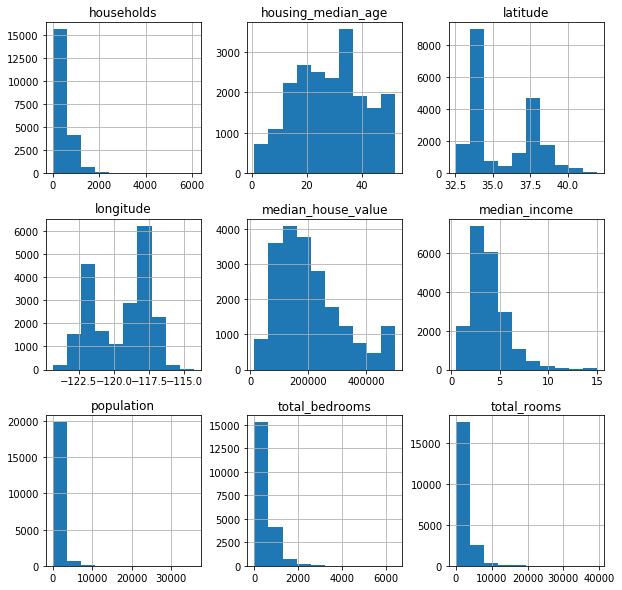

In [0]:
# Load the dataset
data = pd.read_csv('./housing.csv')

data.hist(figsize=(10,10)) # plot histograms of all variables
plt.show()

Plotting the histogram of the variables of the California_housing_dataset shows that none of the variables follow the normal distribution. Let's use define a function to create the histogram and Q-Q plot and then try applying a log transform on the median_income variable. 

In [0]:
# function for histogram and Q-Q plot function

def inspection_plots(dataframe, variable):
    plt.figure(figsize=((14,5)))
    plt.subplot(121)
    dataframe[variable].hist(bins=20)
    plt.xlabel(variable)
    plt.ylabel("counts", rotation=0)
    plt.subplot(122)
    stats.probplot(dataframe[variable], plot=plt)
    
    plt.show()

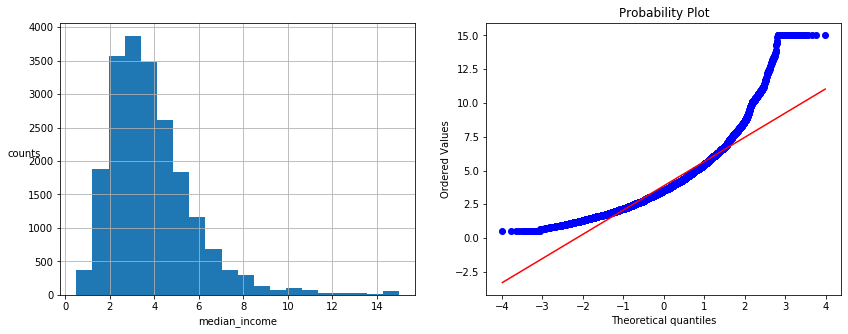

In [0]:
# Graphs before log_transformations
inspection_plots(data, 'median_income')

Histogram clearly shows how skewed the distribution is. Q-Q plot must have the blue dots fall on the 45-degree red line if the variable follows a normal distribution. Log transformation, when applied, will convert the variable into a normal distribution.

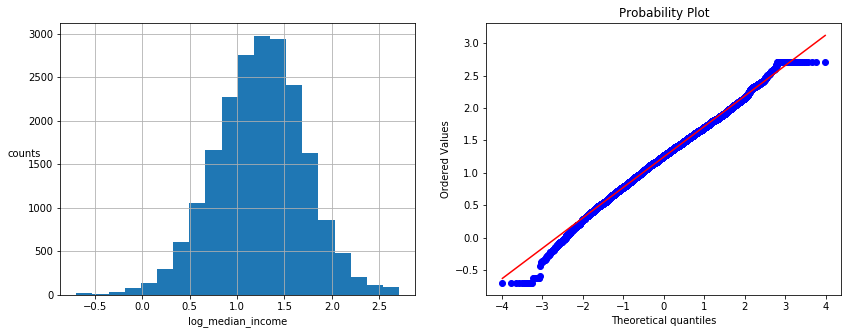

In [0]:
data['log_median_income'] = np.log(data['median_income']) # data['median_income'].transform(np.log)
inspection_plots(data, 'log_median_income')

The transformation has clearly converted the distribution of variable into approximate normal distribution. 

## Reciprocal transformation

Reciprocal transformation takes the input as variables and transforms the values into the reciprocal. For input $X$, reciprocal is given as:
$$
\text{Reciprocal}(x) = \frac{1}{x}
$$

Where, $x$ is any number except zero.

The reciprocal transformation has its sibling called negative reciprocal. The only difference is the negative sign in the formula.

Let's plot the function and see its properties.

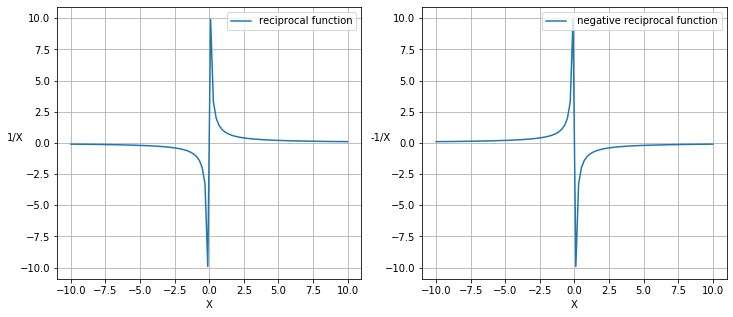

In [0]:
# plotting reciprocal function
X = np.linspace(-10,10,100) #input
reci_y = 1/X # transformed output
neg_reci_y = -1/X

# plotting reciprocal functionso
plt.figure(figsize=((12,5)))
plt.subplot(121)
plt.grid() 
plt.plot(X, reci_y, label="reciprocal function")
plt.xlabel('X')
plt.ylabel('1/X', rotation=0)
plt.legend()
plt.subplot(122)
plt.grid() 
plt.plot(X, neg_reci_y, label=" negative reciprocal function")
plt.xlabel('X')
plt.ylabel('-1/X', rotation=0)
plt.legend()

Two things are clear from the graph of the reciprocal function:
1. The value far away from zero gets squished into a smaller range of values and vice-versa. (changes order of original data)
2. The value of the reciprocal function is not defined at value '0'.

In most practices, you might want to multiply or divide the results of reciprocal transformation by some constant. Doing so helps in managing the numbers.

### Use cases
Similar to logarithmic transformation, reciprocal transformation is for:
- Normalization of the magnitude of variables like log-transformation.
- Converting the right-skewed distribution of variables into a normal distribution.
- Handling negative value of variables where log transformation isn't applicable.

### Limitations
- The value of reciprocal transformation is applicable for non-zero values.

### Demo
The reciprocal transformation is a potent tool for changing the distribution of variables. It also reverses the order among values of the same sign. For the demo, you are using Wine dataset form Scikit Learn package. You don't need to know about the feature or target of this dataset, you are just learning how the distribution changes.

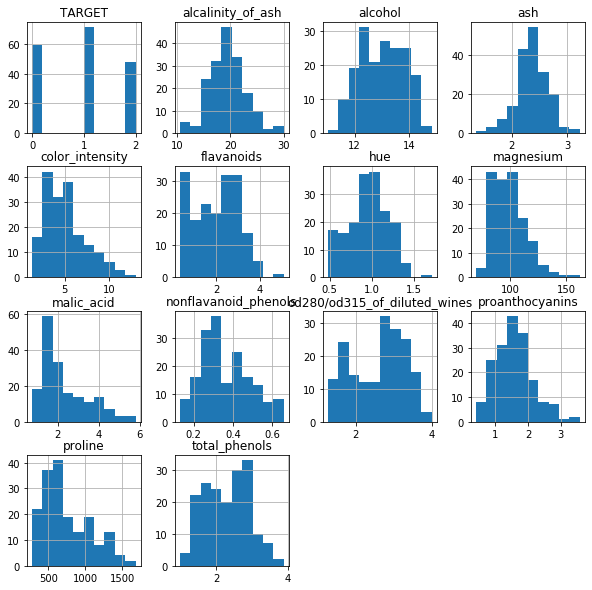

In [0]:
# Using the wine dataset from sklearn
from sklearn.datasets import load_wine
wine_data = load_wine()
wine = pd.DataFrame(wine_data.data,
                      columns=wine_data.feature_names)
wine['TARGET'] = wine_data.target

# plot histograms of all variables
wine.hist(figsize=(10,10))
plt.show()

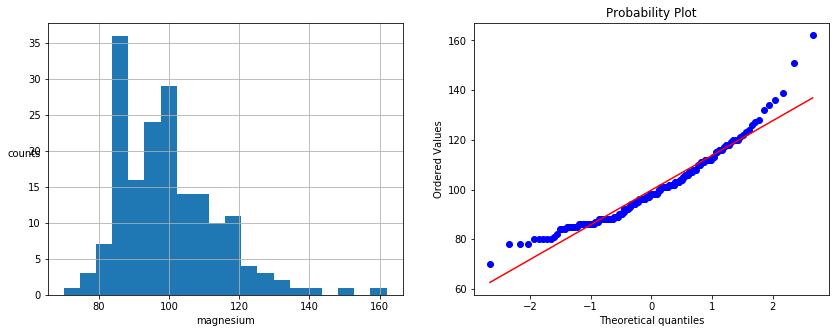

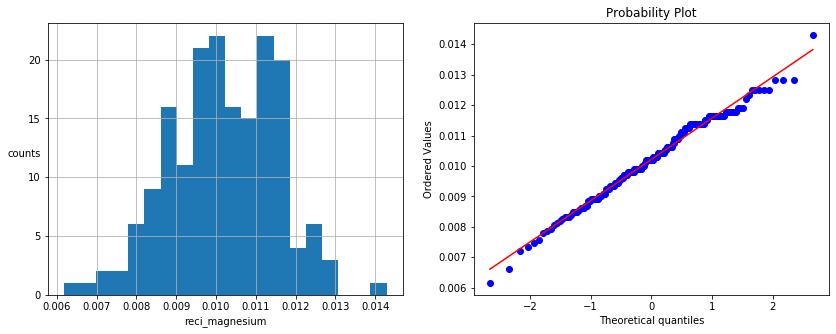

In [0]:
# Reciprocal transformation
wine['reci_magnesium'] = 1/(wine['magnesium']) 
inspection_plots(wine, 'magnesium')
inspection_plots(wine, 'reci_magnesium')


## Exponential/Power Transformation

Exponential transformation is the function that exponentiates the value of a variable to any number of choice known as $\lambda$. Don't get yourself confused with the exponential function, which is the inverse of log transformation. 

Exponential transformation raises the value of a variable to a certain power. Most used examples: Square, cube, square root of the value. The formula for exponential transformation:
$$
\text{exp}(x) = x^\lambda
$$

Where, $x$ is any positive number, and $\lambda$ is the transformation parameter. When $\lambda$ is a proper fraction with multiple of two in the denominator, negative $x$ will result in imaginary numbers are output. So only positive numbers are viable for this case. Otherwise, $x$ is any number in other positive cases of lambda.

Plotting some cases of lambda:

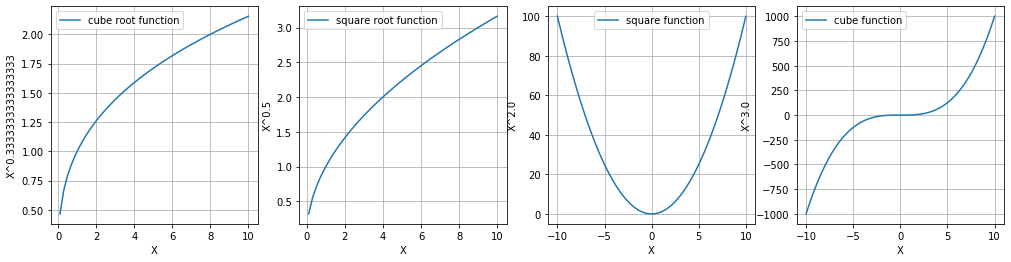

In [0]:
# plotting the different type of power tranformation functions
X = np.linspace(-10,10,100) #input
lamb = [1/3, 0.5, 2.0, 3.0] #values of lambda
labels = ['cube root', 'square root', 'square', 'cube'] # labels for graph
#plotting
plt.figure(figsize=((26,4)))
for i,e in enumerate(lamb):
    pow_y = X**e # transformed output
    plt.subplot(161+i)
    plt.grid() 
    plt.plot(X, pow_y, label=labels[i]+' function')
    plt.xlabel('X')
    plt.ylabel(f'X^{e}')
    plt.legend()

### Use Case
- Root functions have common use of transformation right-skewed distribution of a variable to normal distribution. However, these transforms are less powerful than logarithm transformation.
- Square, cube functions convert left-skewed distribution of a variable to normal distribution.

### Limitations
- Proper fraction lambda containing multiple of two in the denominator cannot take negative values as input.

- Square transformation usually makes sense only if the variables are in range between zero to positive, given that $(-x)^2$ and $x^2$ are identical.

### Demo
Using California_housing_dataset for the demo along with NumPy and Scipy. Root transformation is shown in the demo.

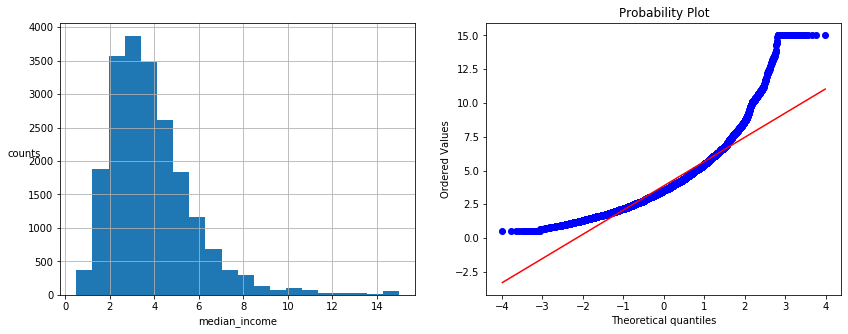

In [0]:
# Graphs before log_transformations
inspection_plots(data, 'median_income')

In proper fractional lambda, increasing the value of the denominator increases the ability to convert right skewed to normal distribution. Keep this in mind. Plotting the power transformation with varying value of $\lambda$.

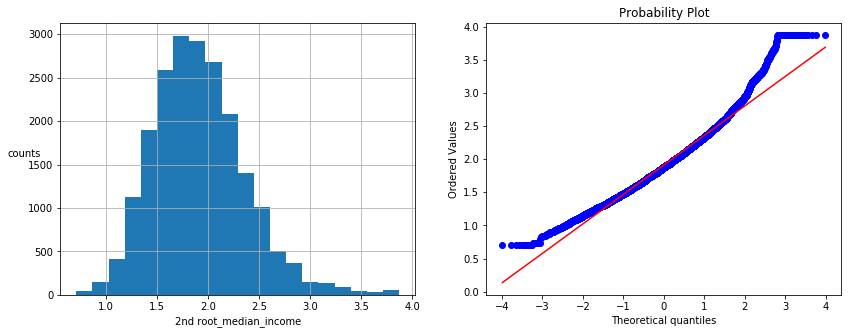

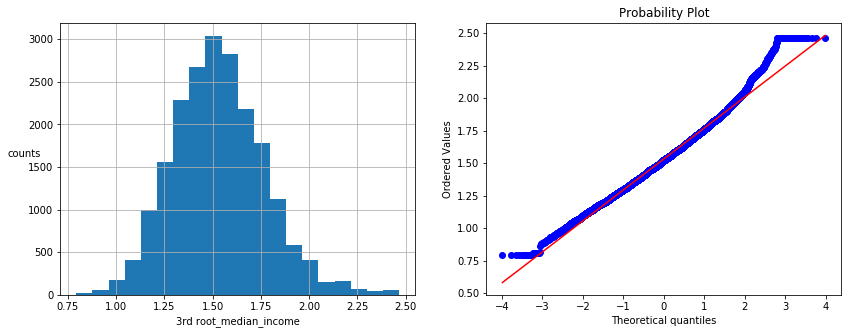

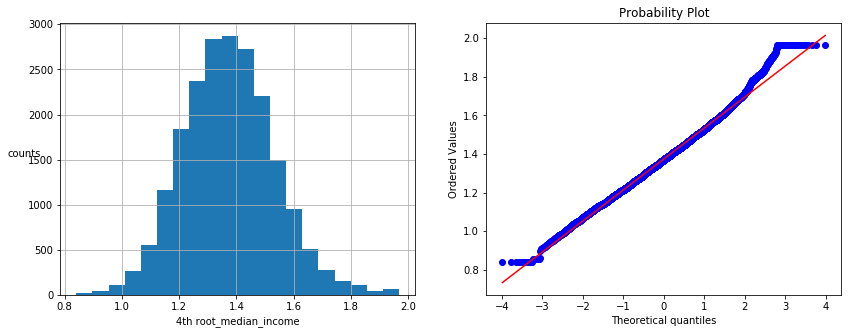

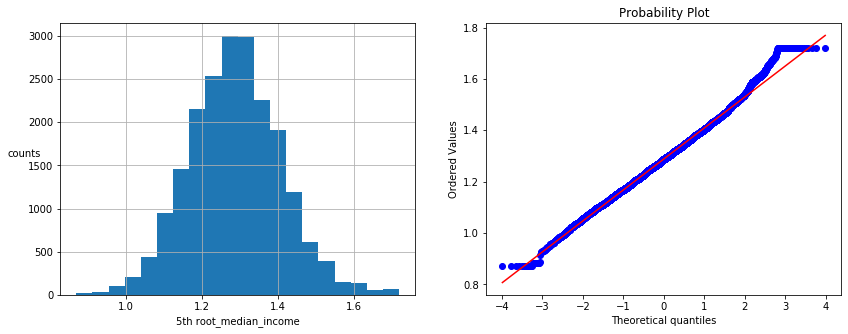

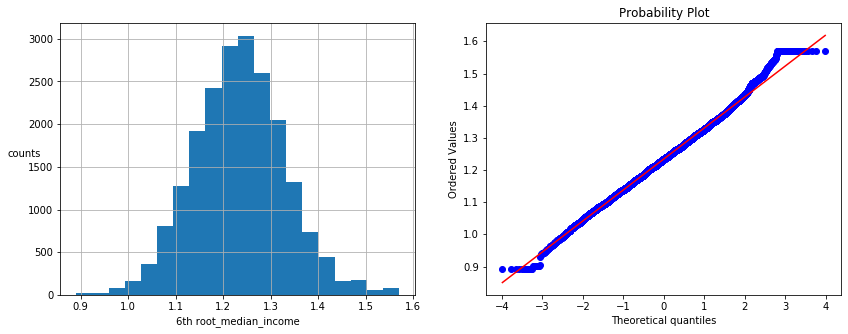

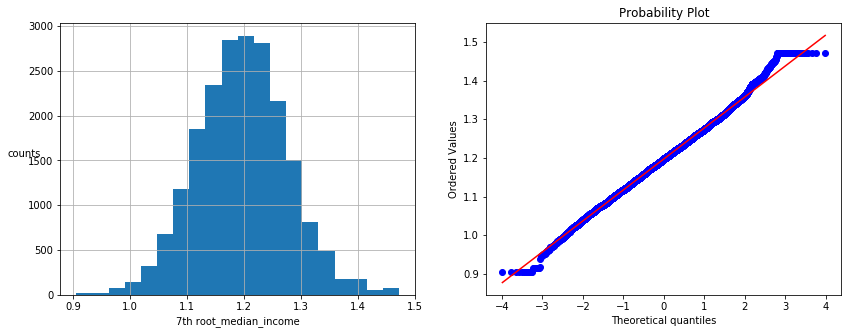

In [0]:
# Root transformation and plotting the histogram and q-q plots
for i in range(2,8):
    if i == 2:
        index = str(i) + 'nd root_median_income'
    elif i == 3:
        index = str(i) + 'rd root_median_income'
    else:
        index = str(i) + 'th root_median_income'
        
    data[index] = np.power(data['median_income'], 1/i) # data['median_income'].transform(np.log)
    inspection_plots(data, index)

## Box-Cox transformation

Box-cox transformation is a mixture of exponential transformation. Box-cox is more widely used than the previously mentioned simple mathematical transformation because it allows scanning of the previously mentioned $\lambda$ parameter for optimal value. The optimal value of the parameter transforms the variable's distribution to the best approximate of normal distribution. The selection of $\lambda$ parameter is done between values _-5 to 5_. Box-cox transformation applies the following formula to the values of variables to produce the transformed output:

$$\large{x^{(\lambda)} = \begin{cases}
    \frac{x^\lambda-1}{\lambda} &\text{if }  \lambda \not= 0\\
    \log(x) &\text{if } \lambda = 0
\end{cases}}$$

Where, $x$ is any positive number.

Let's plot the box-cox function for various values of lambda.

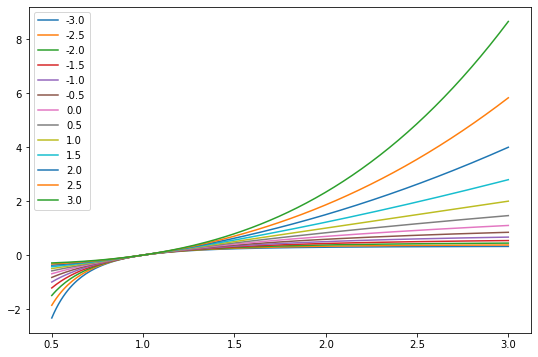

In [15]:
#plotting the box-cox function

X = np.linspace(0.5,3,200) #input
lamb = np.arange(-3,3.5,0.5) #range of values of lambda

plt.figure(figsize=(9,6))
for l in lamb:
    if l != 0: #condition to compute y
        y = (X**l-1)/l 
    else:
        y = np.log(X)
    
    plt.plot(X,y,label=l)
    plt.legend()

Pointing out the information from the graph:
- Values at one get transformed to zero regardless of the $\lambda$ parameter.
- Increasing the $\lambda$ parameter from zero, results in higher value getting transformed into larger values.
- Decreasing the $\lambda$ parameter from zero, results in more approximation to log transformation.

### Use Cases
- Adaptively select the $\lambda$ parameter for converting skewed distribution of variable to normal distribution.

### Limitations
- The box-cox transformation is applicable only for positive numerical values.

### Demo
Scipy package has a function to compute box-cox transformation. The demo uses Scipy's function on California_housing_dataset.

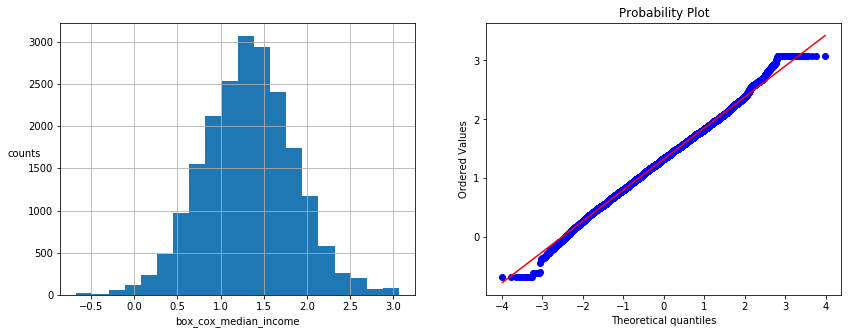

optimal lambda =  0.09085449361507383


In [0]:
## box-cox tranformation
data['box_cox_median_income'], lmbd = stats.boxcox(data['median_income']) #return transformed output and optimal lambda
inspection_plots(data, 'box_cox_median_income')
print('optimal lambda = ', lmbd)

## Yeo-Johnson transformation

Yeo-Johnson transformation is an improvement over the box-cox transformation in the sense that it is applicable for negative valued variables as well. Yeo-Johnson is similar in every other aspect to box-cox transformation. Yeo-Johnson transformation is also applied over skewed distributed variables, which converts the variable into a normal distributed format. This transformation adaptively selects the optimal $\lambda$, similar to box-cox. If your interest has peaked on Yeo-Johnson transformation, read through this [paper]( https://www.stat.umn.edu/arc/yjpower.pdf)

The formula for Yeo-Johnson transformation is as follows:

$${x^{(\lambda)} = \begin{cases}
    \frac{(x+1)^\lambda-1}{\lambda} &\text{if } \lambda \not= 0, x\geq0\\
    \log(x+1), & \text{if } \lambda = 0, x\geq0\\
    \frac{-[(-x+1)^{2-\lambda}-1]}{2-\lambda} & \text{if } \lambda \not= 2, x<0 \\
    \log(-x+1) & \text{if } \lambda =2, x<0 
\end{cases}}$$

The use case of Yeo-Johnson is similar to every other transformation we have discussed before.

### Demo
Once again, Scipy package's function is used to perform Yeo-Johnson transformation on the California_housing_dataset.

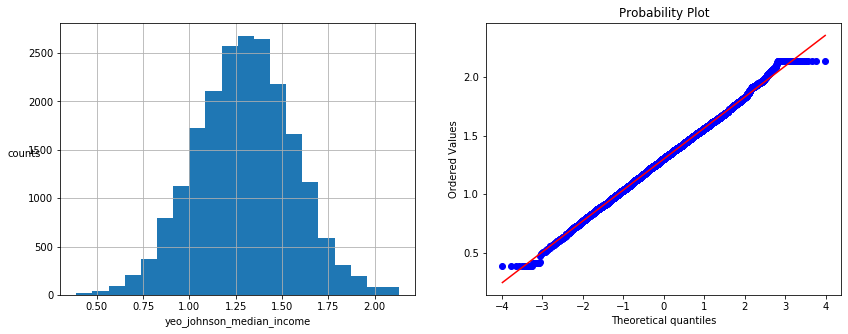

optimal lambda =  -0.19850991676559598


In [0]:
## box-cox tranformation
data['yeo_johnson_median_income'], lmbd = stats.yeojohnson(data['median_income']) #return transformed output and optimal lambda
inspection_plots(data, 'yeo_johnson_median_income')
print('optimal lambda = ', lmbd)

### Key take aways

- All of the mathematical transformations have the common usage of transforming skewed distribution for variables to Gaussian distribution.

- Note, these transformations can only convert skewed distributions; any unusual distribution is nearly impossible to convert to Gaussian even after applying these transformations. 

- Other uses of the transformations are minimizing the effect of outliers and normalization of magnitude differences.

- Each mathematical transformation has some limitations such as the values they can take. 

 - log transformation - only positive values excluding zero.
 - reciprocal transformation - all numbers except zero.
 - square root and box-cox transformation - cannot take -ve values.

- BoxCox and YeoJohnson transformation are useful for automatically selecting the best $\lambda$ parameter for transformation.

## References
1. "Feature Engineering for Machine Learning" - Udemy course by Soledad Galli.
2. "Feature Engineering for Machine Learning Principles and Techniques for Data Scientists" by Alice Zheng and Amanda Casari. pg-15-29